In [ ]:
import numpy as np

# Parámetros del modelo extendido
tamaño_tablero = 19
J = 1  # Interacción básica entre piedras adyacentes
K = 1  # Penalización por grupos con pocas libertades
alfa = 0.1  # Decaimiento de interacción a distancia
L = 0.5  # Coeficiente para efectos de Ko/Seki
M = 0.2  # Importancia de las condiciones de borde

# Inicialización del tablero
tablero = np.zeros((tamaño_tablero, tamaño_tablero))

# Función para calcular la distancia de Manhattan
def distancia_manhattan(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

# Términos del Hamiltoniano Extendido

def interacciones_adyacentes(tablero):
    # Interacciones entre piedras adyacentes
    interaccion = 0
    for x in range(tamaño_tablero):
        for y in range(tamaño_tablero):
            if x < tamaño_tablero - 1:
                interaccion -= J * tablero[x, y] * tablero[x + 1, y]
            if y < tamaño_tablero - 1:
                interaccion -= J * tablero[x, y] * tablero[x, y + 1]
    return interaccion

def termino_captura(tablero):
    # Simplificación del término de captura
    captura = 0
    for x in range(tamaño_tablero):
        for y in range(tamaño_tablero):
            if tablero[x, y] != 0:
                libertades = 0
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < tamaño_tablero and 0 <= ny < tamaño_tablero and tablero[nx, ny] == 0:
                        libertades += 1
                captura += K / (1 + libertades)
    return captura

def interaccion_a_larga_distancia(tablero):
    # Simplificación de la interacción a larga distancia
    interaccion = 0
    for x1 in range(tamaño_tablero):
        for y1 in range(tamaño_tablero):
            for x2 in range(tamaño_tablero):
                for y2 in range(tamaño_tablero):
                    if not (x1 == x2 and y1 == y2):  # Evitar auto-interacción
                        d = distancia_manhattan(x1, y1, x2, y2)
                        interaccion -= J * np.exp(-alfa * d) * tablero[x1, y1] * tablero[x2, y2]
    return interaccion

def efectos_ko_seki(tablero):
    # Esta es una simplificación y debería ser más específica
    # basada en la identificación de patrones de Ko/Seki
    return L

def condiciones_de_borde(tablero):
    # Simplificación de las condiciones de borde
    borde = 0
    for x in range(tamaño_tablero):
        for y in range(tamaño_tablero):
            if x == 0 or x == tamaño_tablero-1 or y == 0 or y == tamaño_tablero-1:
                if tablero[x, y] != 0:  # Piedra en borde
                    borde += M
    return borde

def calcular_hamiltoniano(tablero):
    H = (interacciones_adyacentes(tablero) + termino_captura(tablero) +
         interaccion_a_larga_distancia(tablero) + efectos_ko_seki(tablero) +
         condiciones_de_borde(tablero))
    return H

# Ejemplo de uso
print("Hamiltoniano Extendido del estado inicial:", calcular_hamiltoniano(tablero))


In [17]:
import numpy as np

class GoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size))
        self.previous_board = None
        self.J = 1  # Interacción básica entre piedras adyacentes
        self.K = 1  # Penalización por grupos con pocas libertades
        self.alfa = 0.1  # Decaimiento de interacción a distancia
        self.L = 0.5  # Coeficiente para efectos de Ko/Seki
        self.M = 0.2  # Importancia de las condiciones de borde
    
    def distancia_manhattan(self, x1, y1, x2, y2):
        return abs(x1 - x2) + abs(y1 - y2)
    
    def interacciones_adyacentes(self):
        interaccion = 0
        for x in range(self.size):
            for y in range(self.size):
                if x < self.size - 1:
                    interaccion -= self.J * self.board[x, y] * self.board[x + 1, y]
                if y < self.size - 1:
                    interaccion -= self.J * self.board[x, y] * self.board[x, y + 1]
        return interaccion
    
    def termino_captura(self):
        captura = 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    libertades = 0
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx, ny] == 0:
                            libertades += 1
                    captura += self.K / (1 + libertades)
        return captura
    
    def interaccion_a_larga_distancia(self):
        interaccion = 0
        for x1 in range(self.size):
            for y1 in range(self.size):
                for x2 in range(self.size):
                    for y2 in range(self.size):
                        if not (x1 == x2 and y1 == y2):
                            d = self.distancia_manhattan(x1, y1, x2, y2)
                            interaccion -= self.J * np.exp(-self.alfa * d) * self.board[x1, y1] * self.board[x2, y2]
        return interaccion
    
    def efectos_ko_seki(self):
        # Simplificación de Ko/Seki. Detalles específicos deberían ser implementados aquí.
        return self.L
    
    def condiciones_de_borde(self):
        borde = 0
        for x in range(self.size):
            for y in range(self.size):
                if x == 0 or x == self.size-1 or y == 0 or y == self.size-1:
                    if self.board[x, y] != 0:
                        borde += self.M
        return borde
    
    def calcular_hamiltoniano(self):
        H = (self.interacciones_adyacentes() + self.termino_captura() +
             self.interaccion_a_larga_distancia() + self.efectos_ko_seki() +
             self.condiciones_de_borde())
        return H

# Crear una instancia del juego de Go y calcular el Hamiltoniano
juego = GoGame()
print("Hamiltoniano Extendido del estado inicial:", juego.calcular_hamiltoniano())


Hamiltoniano Extendido del estado inicial: 0.5


<IPython.core.display.Javascript object>


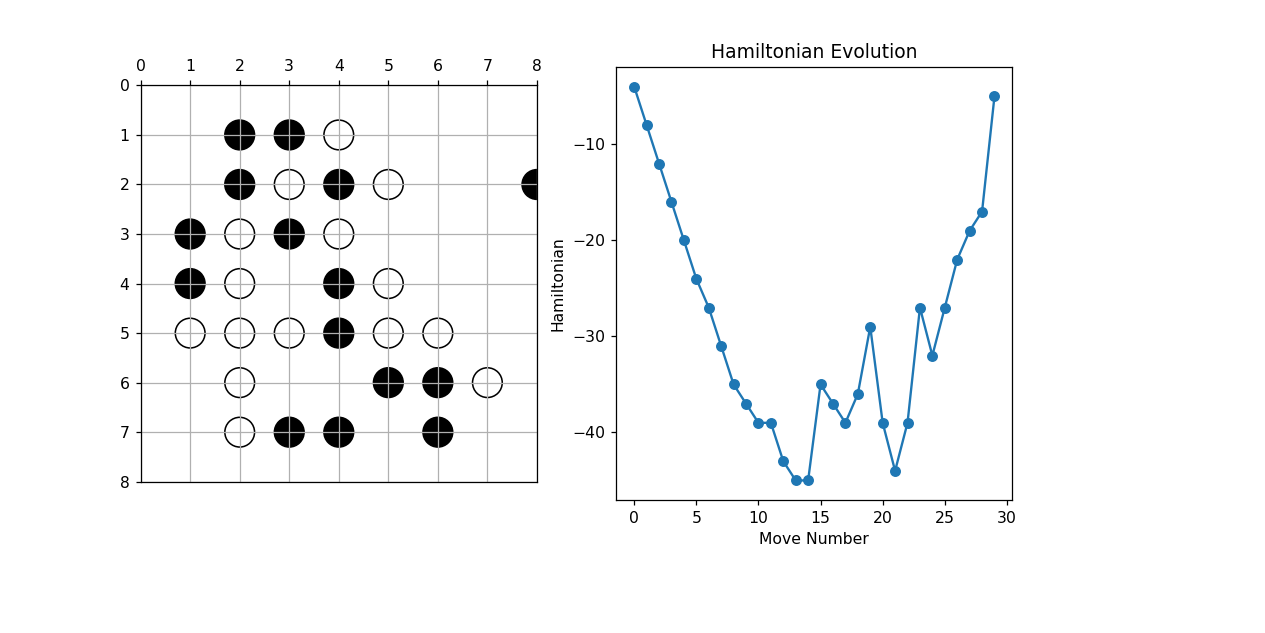

In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)
        self.player_turn = 1  # Start with black (1), alternate with white (-1)
        self.hamiltonian_values = []

    def calculate_hamiltonian(self):
        # More complex Hamiltonian calculation considering liberties and atari situations
        H = 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    if liberties > 0:
                        H -= liberties  # More liberties, lower "energy"
                    if liberties == 1:  # In atari
                        H += 5  # Increase the Hamiltonian due to risk
        self.hamiltonian_values.append(H)
        return H

    def plot_board(self):
        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")

        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.redraw_board()
        plt.show()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.player_turn = -self.player_turn
                hamiltonian = self.calculate_hamiltonian()
                print("Current Hamiltonian: ", hamiltonian)
                self.redraw_board()

    def redraw_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    circle = patches.Circle((y, x), 0.3, facecolor='black', edgecolor='black')
                    self.ax.add_patch(circle)
                elif self.board[x, y] == -1:
                    circle = patches.Circle((y, x), 0.3, facecolor='white', edgecolor='black')
                    self.ax.add_patch(circle)

        # Update Hamiltonian plot
        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values, marker='o')
        plt.draw()

# Example of usage
game = InteractiveGoGame(9)
game.plot_board()


<IPython.core.display.Javascript object>


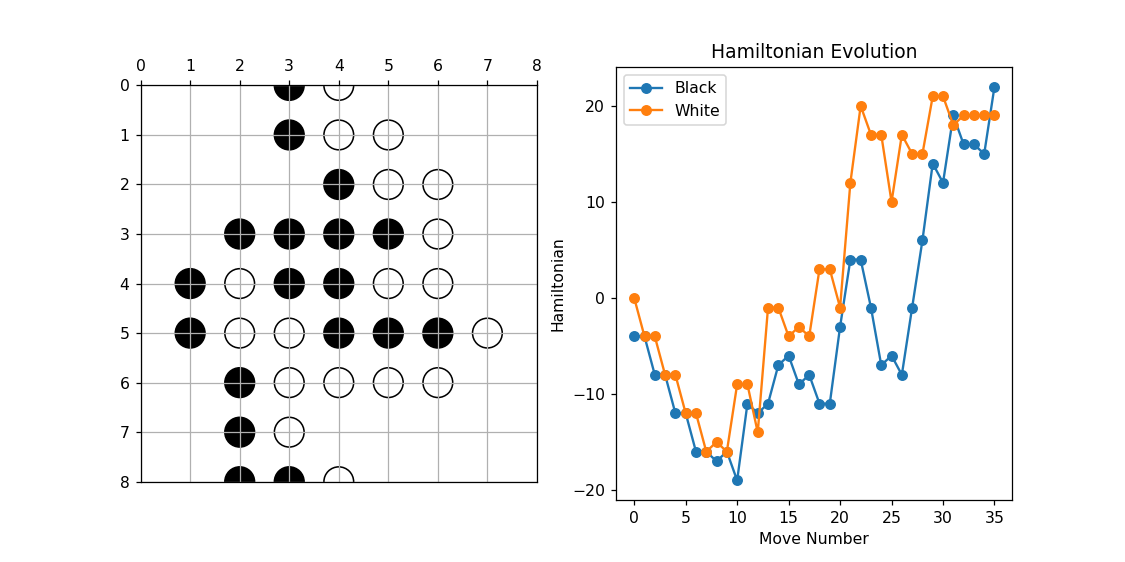

In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)
        self.player_turn = 1  # Start with black (1), alternate with white (-1)
        self.hamiltonian_values_black = []
        self.hamiltonian_values_white = []

    def calculate_hamiltonian(self):
        H_black, H_white = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    if liberties == 1:  # In atari
                        increase = 5  # Increase due to risk
                    else:
                        increase = -liberties  # More liberties, lower "energy"
                    
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_white += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_white.append(H_white)
        return H_black, H_white

    def plot_board(self):
        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot([], [], label='Black')
        self.ax2.plot([], [], label='White')
        self.ax2.legend()

        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.redraw_board()
        plt.show()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.player_turn = -self.player_turn
                H_black, H_white = self.calculate_hamiltonian()
                print("Current Hamiltonian - Black: ", H_black, "White: ", H_white)
                self.redraw_board()

    def redraw_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    circle = patches.Circle((y, x), 0.3, facecolor='black', edgecolor='black')
                    self.ax.add_patch(circle)
                elif self.board[x, y] == -1:
                    circle = patches.Circle((y, x), 0.3, facecolor='white', edgecolor='black')
                    self.ax.add_patch(circle)

        # Update Hamiltonian plot
        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, marker='o', label='Black')
        self.ax2.plot(self.hamiltonian_values_white, marker='o', label='White')
        self.ax2.legend()
        plt.draw()

# Example of usage
game = InteractiveGoGame(9)
game.plot_board()


<IPython.core.display.Javascript object>


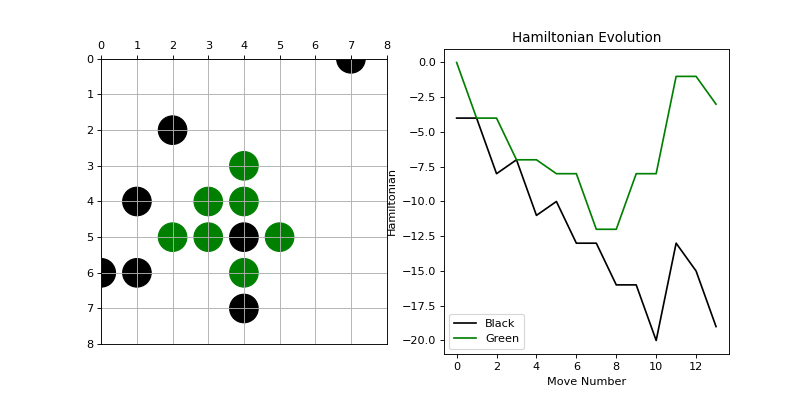

In [70]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for white, 0 for empty
        self.player_turn = 1  # Start with black
        self.hamiltonian_values_black = []
        self.hamiltonian_values_green = []
        self.captures_black = 0
        self.captures_green = 0

        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def calculate_hamiltonian(self):
        # Assuming the Hamiltonian calculation logic is correct
        H_black, H_green = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    increase = 5 if liberties == 1 else -liberties
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_green += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_green.append(H_green)

    def plot_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='green', edgecolor='black'))

        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, label='Black', color='black')
        self.ax2.plot(self.hamiltonian_values_green, label='Green', color='green')
        self.ax2.legend()
        self.fig.canvas.draw()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(event.ydata), int(event.xdata)
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.calculate_hamiltonian()
                print(f"Current Hamiltonian - Black: {self.hamiltonian_values_black[-1]}, Green: {self.hamiltonian_values_green[-1]}")
                self.player_turn = -self.player_turn
                self.plot_board()

# Create and run the game
game = InteractiveGoGame(9)


<IPython.core.display.Javascript object>


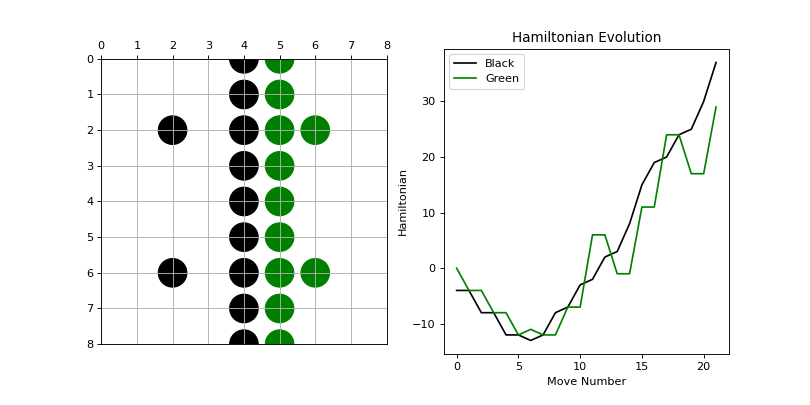

In [75]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for white (now green), 0 for empty
        self.player_turn = 1  # Start with black
        self.hamiltonian_values_black = []
        self.hamiltonian_values_white = []
        self.captures_black = 0
        self.captures_white = 0

        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def calculate_hamiltonian(self):
        H_black, H_white = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    increase = 5 if liberties == 1 else -liberties
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_white += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_white.append(H_white)

    def plot_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='green', edgecolor='black'))

        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, label='Black', color='black')
        self.ax2.plot(self.hamiltonian_values_white, label='Green', color='green')
        self.ax2.legend()
        self.fig.canvas.draw()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.calculate_hamiltonian()
                print(f"Current Hamiltonian - Black: {self.hamiltonian_values_black[-1]}, Green: {self.hamiltonian_values_white[-1]}")
                self.player_turn = -self.player_turn
                self.plot_board()

# Create and run the game
game = InteractiveGoGame(9)


<IPython.core.display.Javascript object>


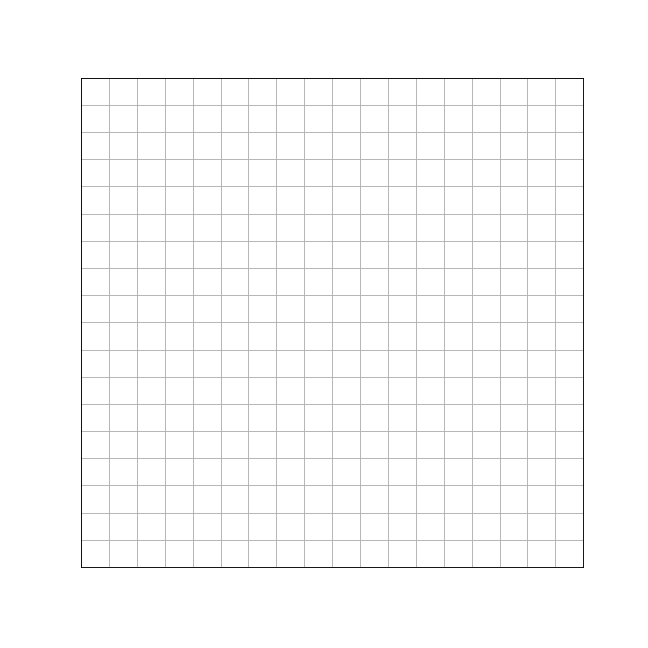

Captures - Black: 0, Green: 0


In [74]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for green
        self.player_turn = 1  # Start with black
        self.captures_black = 0
        self.captures_green = 0

        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def check_liberties(self, x, y):
        """Calculate the number of liberties for the stone/group at position (x, y)."""
        stack = [(x, y)]
        visited = set()
        liberties = set()
        color = self.board[x, y]
        while stack:
            cx, cy = stack.pop()
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if (nx, ny) in visited:
                    continue
                if 0 <= nx < self.size and 0 <= ny < self.size:
                    if self.board[nx, ny] == 0:
                        liberties.add((nx, ny))
                    elif self.board[nx, ny] == color:
                        stack.append((nx, ny))
                visited.add((nx, ny))
        return liberties

    def remove_group(self, x, y):
        """Remove a group of stones from the board."""
        color = self.board[x, y]
        stack = [(x, y)]
        group = set()
        while stack:
            cx, cy = stack.pop()
            if (cx, cy) in group:
                continue
            group.add((cx, cy))
            self.board[cx, cy] = 0
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx, ny] == color:
                    stack.append((nx, ny))
        if color == 1:
            self.captures_green += len(group)
        else:
            self.captures_black += len(group)

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        x, y = int(event.ydata), int(event.xdata)
        if self.board[x, y] != 0:
            return
        self.board[x, y] = self.player_turn
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx, ny] == -self.player_turn:
                if len(self.check_liberties(nx, ny)) == 0:
                    self.remove_group(nx, ny)
        if len(self.check_liberties(x, y)) == 0:  # Self-capture is not allowed unless capturing
            self.remove_group(x, y)  # This might be illegal and need reversing in some rule sets
        self.player_turn = -self.player_turn
        self.plot_board()

    def plot_board(self):
        self.ax.clear()
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.set_xticklabels([])
        self.ax.set_yticklabels([])
        self.ax.xaxis.set_ticks_position('none') 
        self.ax.yaxis.set_ticks_position('none') 
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.45, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.45, color='green', edgecolor='black'))
        self.fig.canvas.draw()
        print(f"Captures - Black: {self.captures_black}, Green: {self.captures_green}")

# Create and run the game
game = InteractiveGoGame()


<IPython.core.display.Javascript object>


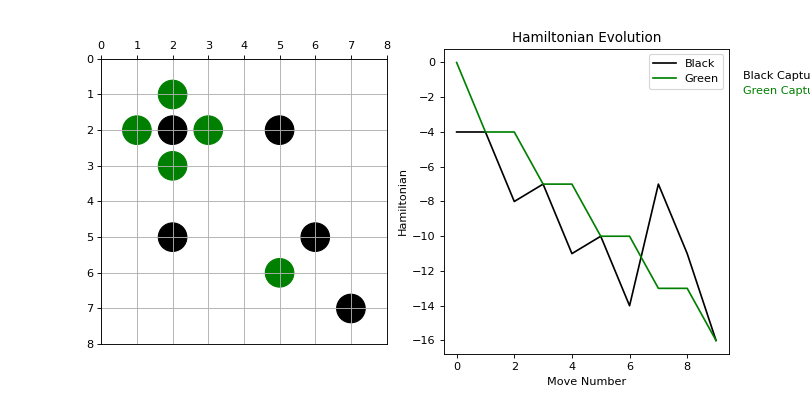

In [76]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for white (now green), 0 for empty
        self.player_turn = 1  # Start with black
        self.hamiltonian_values_black = []
        self.hamiltonian_values_white = []
        self.captures_black = 0
        self.captures_white = 0

        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def calculate_hamiltonian(self):
        H_black, H_white = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    increase = 5 if liberties == 1 else -liberties
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_white += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_white.append(H_white)

    def plot_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='green', edgecolor='black'))

        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, label='Black', color='black')
        self.ax2.plot(self.hamiltonian_values_white, label='Green', color='green')
        self.ax2.legend()

        # Display captures
        self.ax2.text(1.05, 0.9, f'Black Captures: {self.captures_black}', transform=self.ax2.transAxes, color='black')
        self.ax2.text(1.05, 0.85, f'Green Captures: {self.captures_white}', transform=self.ax2.transAxes, color='green')

        self.fig.canvas.draw()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.calculate_hamiltonian()
                print(f"Current Hamiltonian - Black: {self.hamiltonian_values_black[-1]}, Green: {self.hamiltonian_values_white[-1]}")
                self.player_turn = -self.player_turn
                self.plot_board()

# Create and run the game
game = InteractiveGoGame(9)


<IPython.core.display.Javascript object>


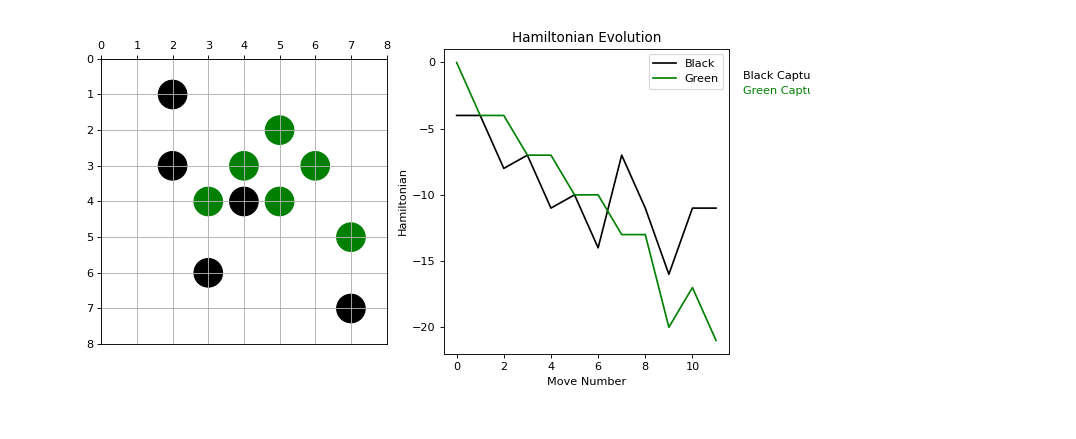

In [77]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for white (now green), 0 for empty
        self.player_turn = 1  # Start with black
        self.hamiltonian_values_black = []
        self.hamiltonian_values_white = []
        self.captures_black = 0
        self.captures_white = 0

        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def calculate_hamiltonian(self):
        H_black, H_white = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    increase = 5 if liberties == 1 else -liberties
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_white += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_white.append(H_white)

    def plot_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='green', edgecolor='black'))

        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, label='Black', color='black')
        self.ax2.plot(self.hamiltonian_values_white, label='Green', color='green')
        self.ax2.legend()
        self.ax2.text(1.05, 0.9, f'Black Captures: {self.captures_black}', transform=self.ax2.transAxes, color='black')
        self.ax2.text(1.05, 0.85, f'Green Captures: {self.captures_white}', transform=self.ax2.transAxes, color='green')
        self.fig.canvas.draw()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.check_and_remove_captures(x, y)
                self.calculate_hamiltonian()
                self.player_turn = -self.player_turn
                self.plot_board()

    def check_and_remove_captures(self, x, y):
        opponent_color = -self.player_turn
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx][ny] == opponent_color:
                if not self.has_liberties(nx, ny):
                    self.remove_group(nx, ny)

    def has_liberties(self, x, y):
        color = self.board[x][y]
        stack = [(x, y)]
        visited = set()
        while stack:
            cx, cy = stack.pop()
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.size and 0 <= ny < self.size:
                    if self.board[nx][ny] == 0:
                        return True
                    elif self.board[nx][ny] == color and (nx, ny) not in visited:
                        visited.add((nx, ny))
                        stack.append((nx, ny))
        return False

    def remove_group(self, x, y):
        color = self.board[x][y]
        stack = [(x, y)]
        visited = set()
        while stack:
            cx, cy = stack.pop()
            self.board[cx][cy] = 0
            visited.add((cx, cy))
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx][ny] == color and (nx, ny) not in visited:
                    stack.append((nx, ny))
        if color == 1:
            self.captures_white += len(visited)
        else:
            self.captures_black += len(visited)

# Create and run the game
game = InteractiveGoGame(9)


<IPython.core.display.Javascript object>


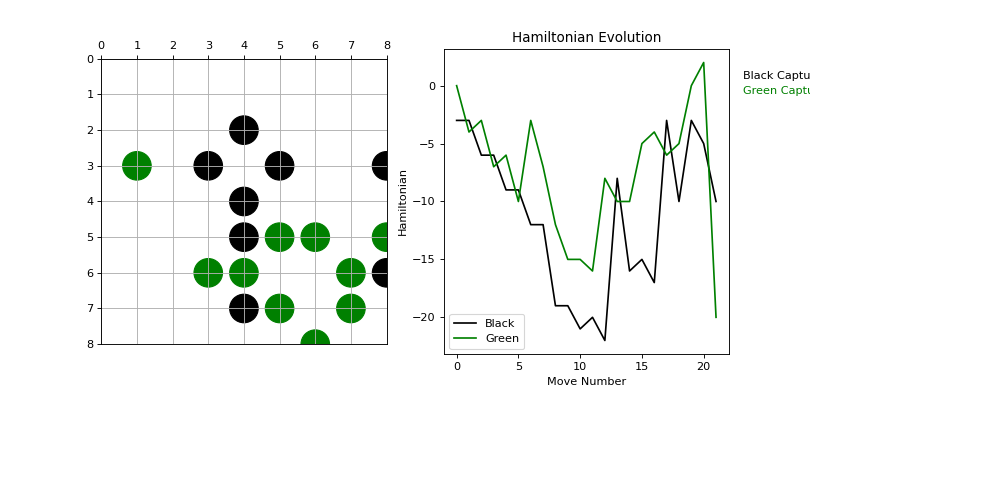

In [78]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class InteractiveGoGame:
    def __init__(self, size=19):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # 1 for black, -1 for white (now green), 0 for empty
        self.player_turn = 1  # Start with black
        self.hamiltonian_values_black = []
        self.hamiltonian_values_white = []
        self.captures_black = 0
        self.captures_white = 0

        self.fig, (self.ax, self.ax2) = plt.subplots(1, 2, figsize=(10, 5))
        self.plot_board()
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        plt.show()

    def calculate_hamiltonian(self):
        H_black, H_white = 0, 0
        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] != 0:
                    liberties = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                                    if 0 <= x + dx < self.size and 0 <= y + dy < self.size and self.board[x + dx][y + dy] == 0)
                    increase = 5 if liberties == 1 else -liberties
                    if self.board[x, y] == 1:
                        H_black += increase
                    else:
                        H_white += increase

        self.hamiltonian_values_black.append(H_black)
        self.hamiltonian_values_white.append(H_white)

    def plot_board(self):
        self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.set_xticks(np.arange(self.size))
        self.ax.set_yticks(np.arange(self.size))
        self.ax.grid(True)
        self.ax.invert_yaxis()
        self.ax.xaxis.tick_top()

        for x in range(self.size):
            for y in range(self.size):
                if self.board[x, y] == 1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='black'))
                elif self.board[x, y] == -1:
                    self.ax.add_patch(patches.Circle((y, x), 0.4, color='green', edgecolor='black'))

        self.ax2.clear()
        self.ax2.set_title("Hamiltonian Evolution")
        self.ax2.set_xlabel("Move Number")
        self.ax2.set_ylabel("Hamiltonian")
        self.ax2.plot(self.hamiltonian_values_black, label='Black', color='black')
        self.ax2.plot(self.hamiltonian_values_white, label='Green', color='green')
        self.ax2.legend()
        # Display captures, ensuring numbers are updated
        self.ax2.text(1.05, 0.9, f'Black Captures: {self.captures_black}', transform=self.ax2.transAxes, color='black')
        self.ax2.text(1.05, 0.85, f'Green Captures: {self.captures_white}', transform=self.ax2.transAxes, color='green')
        self.fig.canvas.draw()

    def on_click(self, event):
        if event.inaxes == self.ax:
            x, y = int(round(event.ydata)), int(round(event.xdata))
            if 0 <= x < self.size and 0 <= y < self.size and self.board[x, y] == 0:
                self.board[x, y] = self.player_turn
                self.check_and_remove_captures(x, y)
                self.calculate_hamiltonian()
                self.player_turn = -self.player_turn
                self.plot_board()

    def check_and_remove_captures(self, x, y):
        opponent_color = -self.player_turn
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx][ny] == opponent_color:
                if not self.has_liberties(nx, ny):
                    self.remove_group(nx, ny)

    def has_liberties(self, x, y):
        color = self.board[x][y]
        stack = [(x, y)]
        visited = set()
        while stack:
            cx, cy = stack.pop()
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.size and 0 <= ny < self.size:
                    if self.board[nx][ny] == 0:
                        return True
                    elif self.board[nx][ny] == color and (nx, ny) not in visited:
                        visited.add((nx, ny))
                        stack.append((nx, ny))
        return False

    def remove_group(self, x, y):
        color = self.board[x][y]
        stack = [(x, y)]
        visited = set()
        while stack:
            cx, cy = stack.pop()
            self.board[cx][cy] = 0
            visited.add((cx, cy))
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.size and 0 <= ny < self.size and self.board[nx][ny] == color and (nx, ny) not in visited:
                    stack.append((nx, ny))
        if color == 1:
            self.captures_white += len(visited)
        else:
            self.captures_black += len(visited)

# Create and run the game
game = InteractiveGoGame(9)
